In [106]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler


mpl.rcParams['figure.figsize'] = (15, 5)
mpl.rcParams['axes.grid'] = False
plt.style.use('seaborn-darkgrid')


In [107]:
# creating a dataframe from the csv file
from datetime import datetime
df = pd.DataFrame(pd.read_csv('../output/video_csi.csv'))
df = df.drop([df.columns[-1]], axis='columns')
# df = df.iloc[:, :-3]
df.reset_index(drop=True, inplace=True)

# # Change UTC Time to CST Time

CST_time_list = []
for time in df['Time'].to_list():
    CST_time_list.append(datetime.fromtimestamp(time))

df['Time'] = pd.DataFrame(CST_time_list)

# Date Time: Minutes Seconds
# df.index = pd.to_datetime(df['Time'], format='%d.%m.%Y %H:%M:%S')
date_time = df['Time'].dt.strftime('%M %S')

# checking our dataframe once again
df.head()


,Time,Subcar_1,Subcar_2,Subcar_3,Subcar_4,Subcar_5,Subcar_6,Subcar_7,Subcar_8,Subcar_9,...,Subcar_43,Subcar_44,Subcar_45,Subcar_46,Subcar_47,Subcar_48,Subcar_49,Subcar_50,Subcar_51,Subcar_52
0,2022-05-30 12:31:04,197.022841,222.611770,298.824363,345.092741,386.865610,460.408514,507.410091,658.663040,709.626662,...,616.793320,598.792952,571.161098,556.400036,553.971118,578.993091,620.966988,658.089660,693.333974,725.385415
1,2022-05-30 12:31:04,185.180993,203.246156,225.375243,265.685905,326.585364,376.017287,418.951071,513.857957,567.275947,...,474.827337,465.288083,456.508488,458.216106,460.214081,474.090709,505.929837,531.919167,516.980657,505.831988
2,2022-05-30 12:31:05,275.181758,254.880364,246.032518,278.411566,311.770749,356.561355,411.325905,531.372751,588.210847,...,498.759461,487.155006,470.227604,458.851828,454.059467,481.814280,515.873046,549.615320,564.156007,571.360657
3,2022-05-30 12:31:05,223.329353,242.441746,290.800619,331.798131,390.988491,458.039300,514.008755,641.891735,715.690576,...,596.985762,571.686103,561.663600,547.153543,548.426841,577.257308,609.407089,652.345001,700.668966,744.492445
4,2022-05-30 12:31:05,144.474911,180.709712,233.790504,284.541737,331.581061,381.693594,451.707870,608.240084,680.307284,...,528.319032,509.039291,510.309710,487.689450,504.239031,534.344458,586.291736,620.220122,661.725774,706.785682


In [108]:
df = df.drop([df.columns[0]], axis='columns')
df.head()

,Subcar_1,Subcar_2,Subcar_3,Subcar_4,Subcar_5,Subcar_6,Subcar_7,Subcar_8,Subcar_9,Subcar_10,...,Subcar_43,Subcar_44,Subcar_45,Subcar_46,Subcar_47,Subcar_48,Subcar_49,Subcar_50,Subcar_51,Subcar_52
0,197.022841,222.611770,298.824363,345.092741,386.865610,460.408514,507.410091,658.663040,709.626662,761.396743,...,616.793320,598.792952,571.161098,556.400036,553.971118,578.993091,620.966988,658.089660,693.333974,725.385415
1,185.180993,203.246156,225.375243,265.685905,326.585364,376.017287,418.951071,513.857957,567.275947,621.003221,...,474.827337,465.288083,456.508488,458.216106,460.214081,474.090709,505.929837,531.919167,516.980657,505.831988
2,275.181758,254.880364,246.032518,278.411566,311.770749,356.561355,411.325905,531.372751,588.210847,623.682612,...,498.759461,487.155006,470.227604,458.851828,454.059467,481.814280,515.873046,549.615320,564.156007,571.360657
3,223.329353,242.441746,290.800619,331.798131,390.988491,458.039300,514.008755,641.891735,715.690576,783.649156,...,596.985762,571.686103,561.663600,547.153543,548.426841,577.257308,609.407089,652.345001,700.668966,744.492445
4,144.474911,180.709712,233.790504,284.541737,331.581061,381.693594,451.707870,608.240084,680.307284,738.823389,...,528.319032,509.039291,510.309710,487.689450,504.239031,534.344458,586.291736,620.220122,661.725774,706.785682


In [109]:
df.shape

(30786, 52)

<AxesSubplot:>

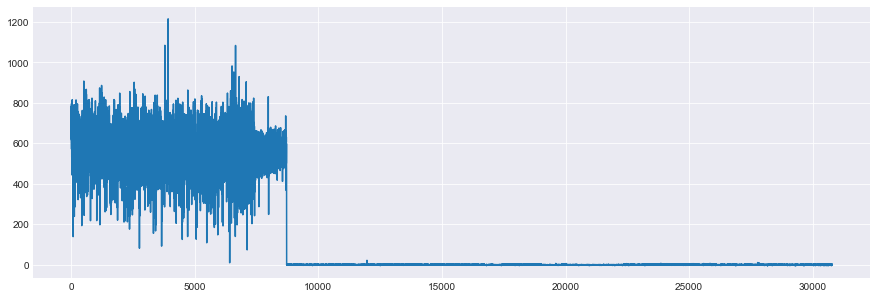

In [110]:
temp = df['Subcar_10']
temp.plot()

In [111]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i + 5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)


In [112]:
WINDOW_SIZE = 100
X, y = df_to_X_y(temp, WINDOW_SIZE)
X.shape, y.shape


((30686, 5, 1), (30686,))

In [113]:
x_train, y_train = X[:20000], y[:20000]
x_test, y_test = X[700:750], y[700:750]
x_val, y_val = X[750:], y[750:]
print('x_train set:', x_train.shape)
print('y_train set:', y_train.shape)
print('x_test set:', x_test.shape)
print('y_test:', y_test.shape)
print('x_val set:', x_val.shape)
print('y_val set:', y_val.shape)


x_train set: (20000, 5, 1)
y_train set: (20000,)
x_test set: (50, 5, 1)
y_test: (50,)
x_val set: (29936, 5, 1)
y_val set: (29936,)


In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers import Adam


In [115]:
model4 = Sequential()
model4.add(InputLayer((5, 1)))
model4.add(Conv1D(64, kernel_size=2))
model4.add(Conv1D(32, kernel_size=2))
model4.add(Flatten())
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_14 (Conv1D)           (None, 4, 64)             192       
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 3, 32)             4128      
_________________________________________________________________
flatten_7 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 776       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 5,105
Trainable params: 5,105
Non-trainable params: 0
_________________________________________________________________


In [116]:
cp = ModelCheckpoint('../save/model_4/', save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    mode='min'
)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(
    learning_rate=0.001), metrics=[MeanAbsoluteError()])

In [117]:
model4.fit(x_train,y_train, validation_data=(x_val, y_val),  epochs=10, callbacks=[early_stopping,cp])

Epoch 1/10
625/625 [==============================] - 1s 2ms/step - loss: 5168.9375 - mean_absolute_error: 36.6783 - val_loss: 2709.2715 - val_mean_absolute_error: 21.4884
Epoch 2/10
625/625 [==============================] - 1s 1ms/step - loss: 4590.6626 - mean_absolute_error: 35.4977 - val_loss: 2805.8191 - val_mean_absolute_error: 22.1584
Epoch 3/10
625/625 [==============================] - 1s 1ms/step - loss: 4648.4150 - mean_absolute_error: 35.7850 - val_loss: 2817.5793 - val_mean_absolute_error: 22.1862


In [118]:
from tensorflow.keras.models import load_model
model1 = load_model('../save/model_4/')


In [119]:
test_predictions1 = model1.predict(x_test).flatten()
test_results1 = pd.DataFrame(
    data={'Test predictions': test_predictions1, 'Actuals': y_test})
test_results1


,Test predictions,Actuals
0,654.877136,689.014514
1,656.850647,600.608025
2,650.064148,788.858035
3,706.346313,614.733275
4,658.850159,566.742446
5,631.725464,579.613664
6,592.313110,584.811081
7,602.681641,717.649636
8,625.098328,612.594483
9,606.963623,575.633564


In [120]:
test_predictions1 = model1.predict(x_test).flatten()
test_results1 = pd.DataFrame(
    data={'Test predictions': test_predictions1, 'Actuals': y_test})
test_results1


,Test predictions,Actuals
0,654.877136,689.014514
1,656.850647,600.608025
2,650.064148,788.858035
3,706.346313,614.733275
4,658.850159,566.742446
5,631.725464,579.613664
6,592.313110,584.811081
7,602.681641,717.649636
8,625.098328,612.594483
9,606.963623,575.633564


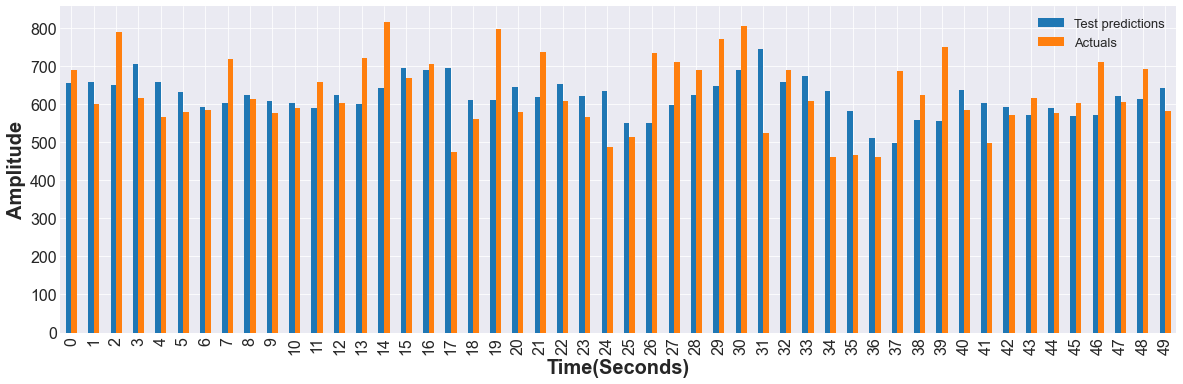

In [121]:
fig, ax = plt.subplots(figsize=(20, 6))
test_results1.plot(kind='bar', ax=ax)
ax.set_xlabel("Time(Seconds)", fontsize=20, fontweight='bold')
ax.set_ylabel("Amplitude", fontsize=20, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=13)
plt.show()


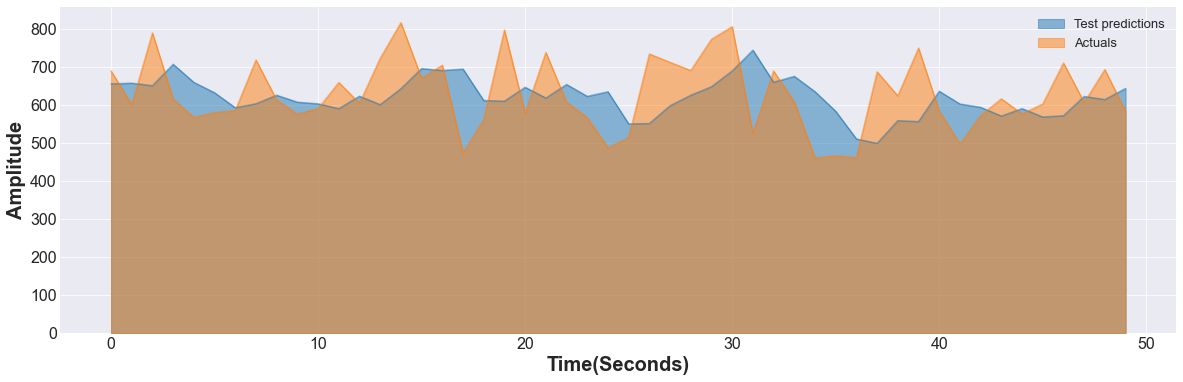

In [122]:
fig, ax = plt.subplots(figsize=(20, 6))
test_results1.plot(kind='area', ax=ax, stacked=False)
ax.set_xlabel("Time(Seconds)", fontsize=20, fontweight='bold')
ax.set_ylabel("Amplitude", fontsize=20, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=13)
plt.show()


No handles with labels found to put in legend.


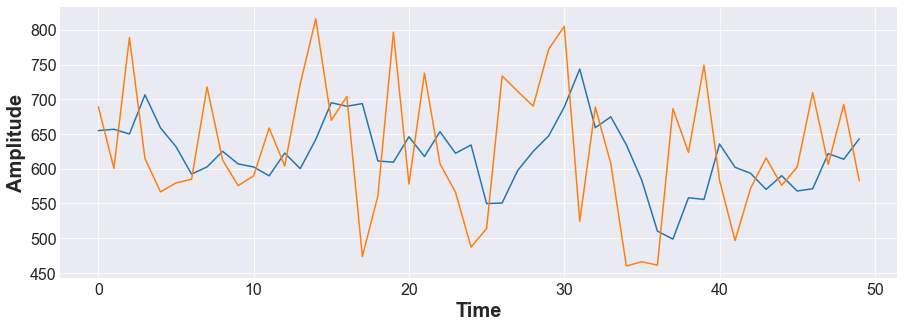

In [123]:
plt.plot(test_results1['Test predictions'])
plt.plot(test_results1['Actuals'])
plt.xlabel("Time", fontsize=20, fontweight='bold')
plt.ylabel("Amplitude", fontsize=20, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=13)
plt.show()


In [124]:
model5 = Sequential()
model5.add(InputLayer((5, 1)))
model5.add(Conv1D(64, kernel_size=2,))
model5.add(Conv1D(32, kernel_size=2, ))
model5.add(Flatten())
model5.add(Dense(8, 'relu'))
model5.add(Dense(1, 'linear'))

model5.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 4, 64)             192       
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 3, 32)             4128      
_________________________________________________________________
flatten_8 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 776       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 5,105
Trainable params: 5,105
Non-trainable params: 0
_________________________________________________________________


In [125]:
cp3 = ModelCheckpoint('../save/model_5/', save_best_only=True)
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    mode='min'
)
model5.compile(optimizer=Adam(learning_rate=0.0001),
               loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])


In [126]:
model5.fit(x_train, y_train, validation_data=(x_val, y_val),
           epochs=10, callbacks=[early_stopping, cp3])

Epoch 1/10
625/625 [==============================] - 1s 2ms/step - loss: 17224.4668 - mean_absolute_error: 57.1358 - val_loss: 2788.0779 - val_mean_absolute_error: 21.6376
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 4523.2437 - mean_absolute_error: 34.9639 - val_loss: 2710.7244 - val_mean_absolute_error: 21.3779
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 4482.6255 - mean_absolute_error: 34.7940 - val_loss: 2696.7107 - val_mean_absolute_error: 21.3526
Epoch 4/10
625/625 [==============================] - 1s 1ms/step - loss: 4475.2832 - mean_absolute_error: 34.7977 - val_loss: 2754.5789 - val_mean_absolute_error: 21.6130
Epoch 5/10
625/625 [==============================] - 1s 1ms/step - loss: 4460.8657 - mean_absolute_error: 34.7839 - val_loss: 2698.7639 - val_mean_absolute_error: 21.4007


In [127]:
from tensorflow.keras.models import load_model
model5 = load_model('../save/model_5/')


In [128]:
test_predictions2 = model5.predict(x_test).flatten()
test_results2 = pd.DataFrame(
    data={'Test predictions': test_predictions2, 'Actuals': y_test})
test_results2


,Test predictions,Actuals
0,661.267212,689.014514
1,662.953247,600.608025
2,657.794922,788.858035
3,720.164856,614.733275
4,676.115967,566.742446
5,630.039551,579.613664
6,608.429688,584.811081
7,615.507263,717.649636
8,636.672363,612.594483
9,618.768494,575.633564


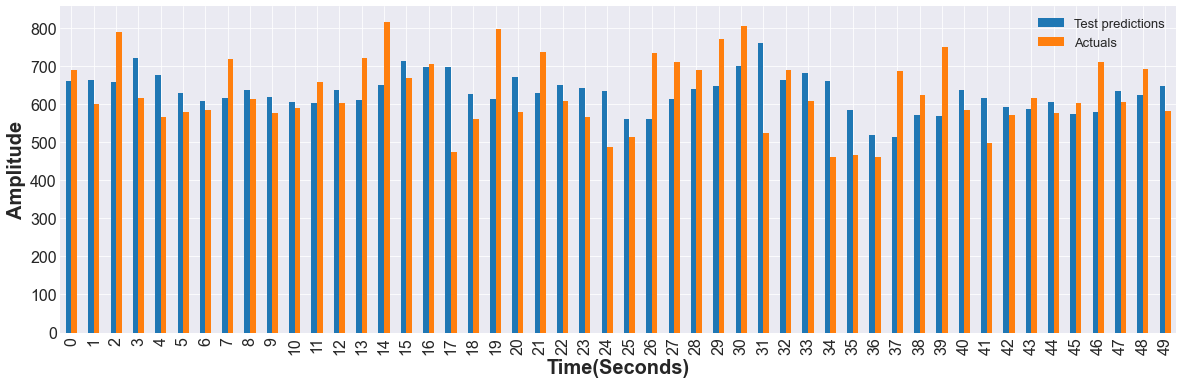

In [129]:
fig, ax = plt.subplots(figsize=(20, 6))
test_results2.plot(kind='bar', ax=ax)
ax.set_xlabel("Time(Seconds)", fontsize=20, fontweight='bold')
ax.set_ylabel("Amplitude", fontsize=20, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=13)
plt.show()


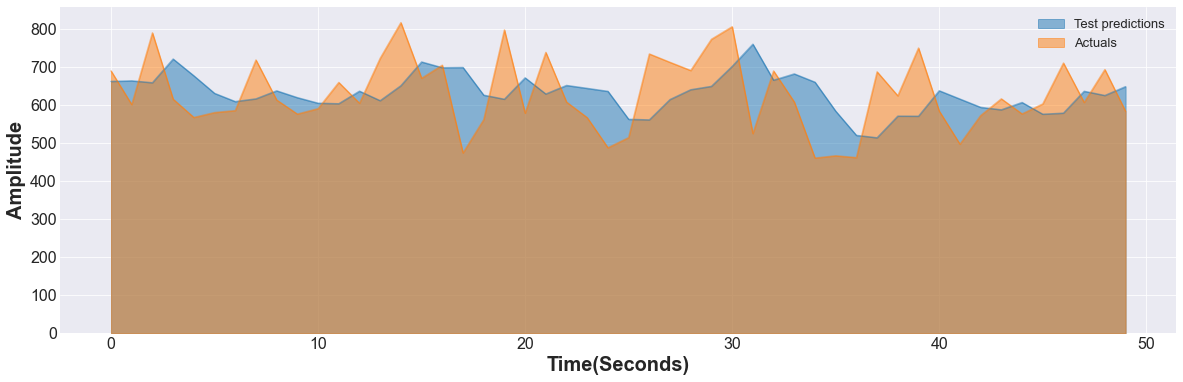

In [130]:
fig, ax = plt.subplots(figsize=(20, 6))
test_results2.plot(kind='area', ax=ax, stacked=False)
ax.set_xlabel("Time(Seconds)", fontsize=20, fontweight='bold')
ax.set_ylabel("Amplitude", fontsize=20, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=13)
plt.show()


No handles with labels found to put in legend.


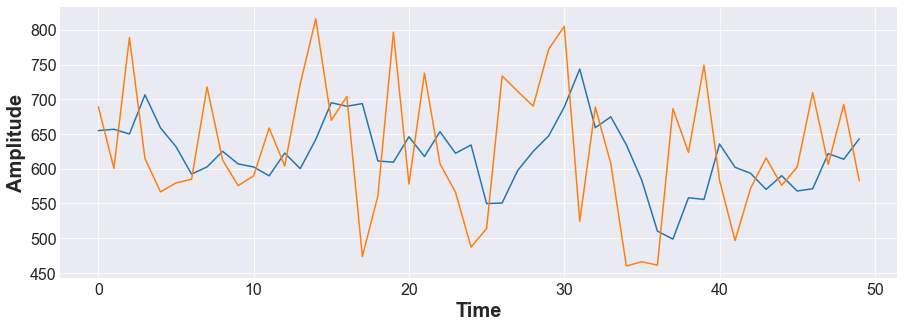

In [131]:
plt.plot(test_results1['Test predictions'])
plt.plot(test_results1['Actuals'])
plt.xlabel("Time", fontsize=20, fontweight='bold')
plt.ylabel("Amplitude", fontsize=20, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=13)
